In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import matplotlib.patches as mpatches
import os

In [54]:
chr_len=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/C_elegands_project/21.repeat_analysis/GC_content/Caenorhabditis_elegans.WBcel235.dna.toplevel.fa.len",sep="\s+",header=None)[[0,4]]
I_chr=pd.DataFrame([['I']*len(np.arange(0,chr_len[chr_len[0]=='I'][4].iloc[0],100000)),np.arange(0,chr_len[chr_len[0]=='I'][4].iloc[0],100000),np.arange(100000,chr_len[chr_len[0]=='I'][4].iloc[0]+100000,100000)]).T
II_chr=pd.DataFrame([['II']*len(np.arange(0,chr_len[chr_len[0]=='II'][4].iloc[0],100000)),np.arange(0,chr_len[chr_len[0]=='II'][4].iloc[0],100000),np.arange(100000,chr_len[chr_len[0]=='II'][4].iloc[0]+100000,100000)]).T
III_chr=pd.DataFrame([['III']*len(np.arange(0,chr_len[chr_len[0]=='III'][4].iloc[0],100000)),np.arange(0,chr_len[chr_len[0]=='III'][4].iloc[0],100000),np.arange(100000,chr_len[chr_len[0]=='III'][4].iloc[0]+100000,100000)]).T
V_chr=pd.DataFrame([['V']*len(np.arange(0,chr_len[chr_len[0]=='V'][4].iloc[0],100000)),np.arange(0,chr_len[chr_len[0]=='V'][4].iloc[0],100000),np.arange(100000,chr_len[chr_len[0]=='V'][4].iloc[0]+100000,100000)]).T
IV_chr=pd.DataFrame([['IV']*len(np.arange(0,chr_len[chr_len[0]=='IV'][4].iloc[0],100000)),np.arange(0,chr_len[chr_len[0]=='IV'][4].iloc[0],100000),np.arange(100000,chr_len[chr_len[0]=='IV'][4].iloc[0]+100000,100000)]).T
X_chr=pd.DataFrame([['X']*len(np.arange(0,chr_len[chr_len[0]=='X'][4].iloc[0],100000)),np.arange(0,chr_len[chr_len[0]=='X'][4].iloc[0],100000),np.arange(100000,chr_len[chr_len[0]=='X'][4].iloc[0]+100000,100000)]).T
chromosomal_bins=pd.concat([I_chr,II_chr,III_chr,IV_chr,V_chr,X_chr],axis=0)
chromosomal_bins.to_csv("/nfs/scistore18/vicosgrp/melkrewi/C_elegands_project/20.mask_genome/chromosomal_bins.bed",sep="\t",header=True,index=False)
chromosomal_bins['index']=(chromosomal_bins[0]).astype('str')+'-'+(chromosomal_bins[1]).astype('str')+'-'+(chromosomal_bins[2]).astype('str')

In [55]:
DUPs_control_in_chromosomal_bins=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/C_elegands_project/21.repeat_analysis/DUPs_control_in_chromosomal_bins.txt",sep="\t",header=None)
DUPs_mutants_in_chromosomal_bins=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/C_elegands_project/21.repeat_analysis/DUPs_mutant_in_chromosomal_bins.txt",sep="\t",header=None)

In [56]:
DUPs_control_in_chromosomal_bins['SVLEN']=DUPs_control_in_chromosomal_bins[10].str.split('SVLEN=',expand=True)[1].str.split(';',expand=True)[0].astype(int)
DUPs_mutants_in_chromosomal_bins['SVLEN']=DUPs_mutants_in_chromosomal_bins[10].str.split('SVLEN=',expand=True)[1].str.split(';',expand=True)[0].astype(int)
#DUPs_control_in_chromosomal_bins['DB']=DUPs_control_in_chromosomal_bins[10].str.split('RE=',expand=True)[1].str.split(';',expand=True)[0].astype('int') #vcf[9].str.split(':',expand=True)[3].astype(int)
#DUPs_control_in_chromosomal_bins=DUPs_control_in_chromosomal_bins[(DUPs_control_in_chromosomal_bins['DB']==1)]
#DUPs_mutants_in_chromosomal_bins['DB']=DUPs_mutants_in_chromosomal_bins[10].str.split('RE=',expand=True)[1].str.split(';',expand=True)[0].astype('int') #vcf[9].str.split(':',expand=True)[3].astype(int)
#DUPs_mutants_in_chromosomal_bins=DUPs_mutants_in_chromosomal_bins[(DUPs_mutants_in_chromosomal_bins['DB']==1)]

In [57]:
DUPs_control_in_chromosomal_bins=DUPs_control_in_chromosomal_bins[DUPs_control_in_chromosomal_bins['SVLEN']>=1000]
DUPs_mutants_in_chromosomal_bins=DUPs_mutants_in_chromosomal_bins[DUPs_mutants_in_chromosomal_bins['SVLEN']>=1000]

In [58]:
DUPs_control_in_chromosomal_bins['count']=(DUPs_control_in_chromosomal_bins[0]).astype('str')+'-'+(DUPs_control_in_chromosomal_bins[1]).astype('str')+'-'+(DUPs_control_in_chromosomal_bins[2]).astype('str')#.groupby([0,1,2]).size()#.reset_index()#[[0,1,2,6]]
DUPs_mutants_in_chromosomal_bins['count']=(DUPs_mutants_in_chromosomal_bins[0]).astype('str')+'-'+(DUPs_mutants_in_chromosomal_bins[1]).astype('str')+'-'+(DUPs_mutants_in_chromosomal_bins[2]).astype('str')#.groupby([0,1,2]).size()#.reset_index()#[[0,1,2,6]]

In [59]:
DUPs_control_in_chromosomal_bins_counts=pd.DataFrame(DUPs_control_in_chromosomal_bins['count'].value_counts()).reset_index()
DUPs_mutants_in_chromosomal_bins_counts=pd.DataFrame(DUPs_mutants_in_chromosomal_bins['count'].value_counts()).reset_index()

In [60]:
repeats_in_chromosomal_bins=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/C_elegands_project/21.repeat_analysis/repeats_in_chromosomal_bins",sep="\t",header=None)
repeats_in_chromosomal_bins_aggregate=repeats_in_chromosomal_bins.groupby([0,1,2]).sum([6]).reset_index()[[0,1,2,6]]
repeats_in_chromosomal_bins_aggregate['index']=(repeats_in_chromosomal_bins_aggregate[0]).astype('str')+'-'+(repeats_in_chromosomal_bins_aggregate[1]).astype('str')+'-'+(repeats_in_chromosomal_bins_aggregate[2]).astype('str')#.groupby([0,1,2]).size()#.reset_index()#[[0,1,2,6]]
repeats_in_chromosomal_bins_aggregate['percentage_repetative_content']=repeats_in_chromosomal_bins_aggregate[6]/100000

In [61]:
genes_in_chromosomal_bins=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/C_elegands_project/21.repeat_analysis/genes_in_chromosomal_bins",sep="\t",header=None)
#genes_in_chromosomal_bins=genes_in_chromosomal_bins[genes_in_chromosomal_bins[12]>100]
genes_in_chromosomal_bins['count_genes']=(genes_in_chromosomal_bins[0]).astype('str')+'-'+(genes_in_chromosomal_bins[1]).astype('str')+'-'+(genes_in_chromosomal_bins[2]).astype('str')#.groupby([0,1,2]).size()#.reset_index()#[[0,1,2,6]]
genes_in_chromosomal_bins_counts=pd.DataFrame(genes_in_chromosomal_bins['count_genes'].value_counts()).reset_index()
genes_in_chromosomal_bins_counts=pd.merge(chromosomal_bins,genes_in_chromosomal_bins_counts,on='index',how='left').fillna(0)

In [62]:
DUPs_control_in_chromosomal_bins_counts_and_repeats=pd.merge(DUPs_control_in_chromosomal_bins_counts,repeats_in_chromosomal_bins_aggregate,on='index',how='right')
DUPs_mutants_in_chromosomal_bins_counts_and_repeats=pd.merge(DUPs_mutants_in_chromosomal_bins_counts,repeats_in_chromosomal_bins_aggregate,on='index',how='right')
DUPs_control_in_chromosomal_bins_counts_and_repeats['count']=DUPs_control_in_chromosomal_bins_counts_and_repeats['count'].fillna(0)
DUPs_mutants_in_chromosomal_bins_counts_and_repeats['count']=DUPs_mutants_in_chromosomal_bins_counts_and_repeats['count'].fillna(0)

In [63]:
DUPs_control_in_chromosomal_bins_counts_and_genes=pd.merge(DUPs_control_in_chromosomal_bins_counts,genes_in_chromosomal_bins_counts,on='index',how='right')
DUPs_mutants_in_chromosomal_bins_counts_and_genes=pd.merge(DUPs_mutants_in_chromosomal_bins_counts,genes_in_chromosomal_bins_counts,on='index',how='right')
DUPs_control_in_chromosomal_bins_counts_and_genes['count']=DUPs_control_in_chromosomal_bins_counts_and_genes['count'].fillna(0)
DUPs_mutants_in_chromosomal_bins_counts_and_genes['count']=DUPs_mutants_in_chromosomal_bins_counts_and_genes['count'].fillna(0)

Text(0.5, 1.0, 'mutant')

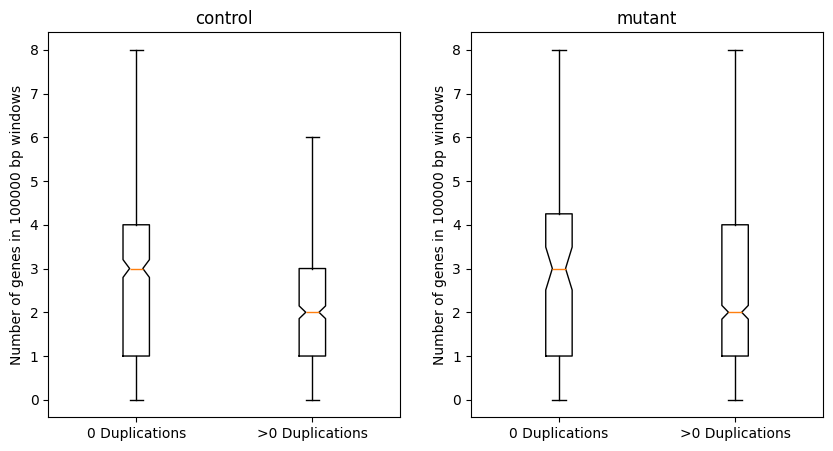

In [64]:
fig = plt.figure(figsize=(10, 5)) # Set the figure size
plt.subplot(1,2,1)
plt.boxplot([DUPs_control_in_chromosomal_bins_counts_and_genes[DUPs_control_in_chromosomal_bins_counts_and_genes['count']==0]['count_genes'],DUPs_control_in_chromosomal_bins_counts_and_genes[DUPs_control_in_chromosomal_bins_counts_and_genes['count']>0]['count_genes']],showfliers=False,notch=True)
plt.xticks([1,2],["0 Duplications",">0 Duplications"])
plt.ylabel("Number of genes in 100000 bp windows")
plt.title("control")
plt.subplot(1,2,2)
plt.boxplot([DUPs_mutants_in_chromosomal_bins_counts_and_genes[DUPs_mutants_in_chromosomal_bins_counts_and_genes['count']==0]['count_genes'],DUPs_mutants_in_chromosomal_bins_counts_and_genes[DUPs_mutants_in_chromosomal_bins_counts_and_genes['count']>0]['count_genes']],showfliers=False,notch=True)
plt.xticks([1,2],["0 Duplications",">0 Duplications"])
plt.ylabel("Number of genes in 100000 bp windows")
plt.title("mutant")

In [70]:
from scipy.stats import ranksums
ranksums(DUPs_control_in_chromosomal_bins_counts_and_genes[DUPs_control_in_chromosomal_bins_counts_and_genes['count']==0]['count_genes'], DUPs_control_in_chromosomal_bins_counts_and_genes[DUPs_control_in_chromosomal_bins_counts_and_genes['count']>0]['count_genes'], alternative='two-sided')

RanksumsResult(statistic=4.479243515045685, pvalue=7.4908038348309246e-06)

In [75]:
from scipy.stats import ranksums
ranksums(DUPs_mutants_in_chromosomal_bins_counts_and_genes[DUPs_mutants_in_chromosomal_bins_counts_and_genes['count']==0]['count_genes'], DUPs_mutants_in_chromosomal_bins_counts_and_genes[DUPs_mutants_in_chromosomal_bins_counts_and_genes['count']>0]['count_genes'], alternative='two-sided')

RanksumsResult(statistic=2.4036659142287595, pvalue=0.016231599546671735)

Text(0.5, 1.0, 'mutant')

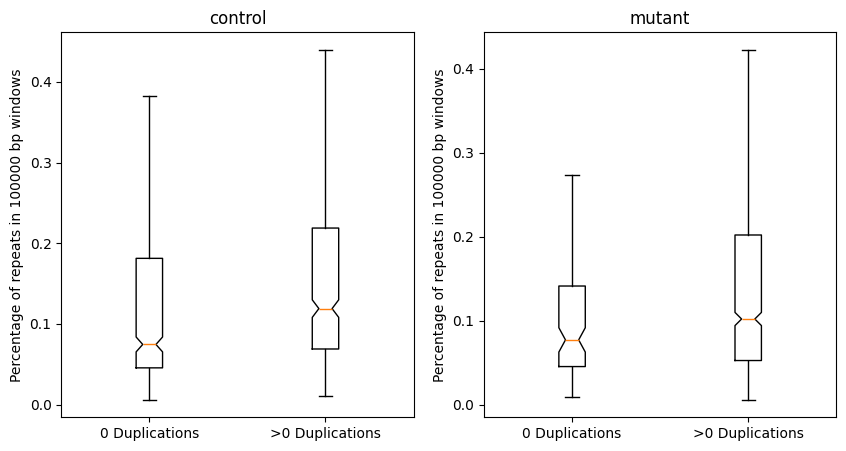

In [65]:
fig = plt.figure(figsize=(10, 5)) # Set the figure size
plt.subplot(1,2,1)
plt.boxplot([DUPs_control_in_chromosomal_bins_counts_and_repeats[DUPs_control_in_chromosomal_bins_counts_and_repeats['count']==0]['percentage_repetative_content'],DUPs_control_in_chromosomal_bins_counts_and_repeats[DUPs_control_in_chromosomal_bins_counts_and_repeats['count']>0]['percentage_repetative_content']],showfliers=False,notch=True)
plt.xticks([1,2],["0 Duplications",">0 Duplications"])
plt.ylabel("Percentage of repeats in 100000 bp windows")
plt.title("control")
plt.subplot(1,2,2)
plt.boxplot([DUPs_mutants_in_chromosomal_bins_counts_and_repeats[DUPs_mutants_in_chromosomal_bins_counts_and_repeats['count']==0]['percentage_repetative_content'],DUPs_mutants_in_chromosomal_bins_counts_and_repeats[DUPs_mutants_in_chromosomal_bins_counts_and_repeats['count']>0]['percentage_repetative_content']],showfliers=False,notch=True)
plt.xticks([1,2],["0 Duplications",">0 Duplications"])
plt.ylabel("Percentage of repeats in 100000 bp windows")
plt.title("mutant")

In [77]:
from scipy.stats import ranksums
ranksums(DUPs_control_in_chromosomal_bins_counts_and_repeats[DUPs_control_in_chromosomal_bins_counts_and_repeats['count']==0]['percentage_repetative_content'], DUPs_control_in_chromosomal_bins_counts_and_repeats[DUPs_control_in_chromosomal_bins_counts_and_repeats['count']>0]['percentage_repetative_content'], alternative='two-sided')

RanksumsResult(statistic=-6.085540326156183, pvalue=1.1609909698468336e-09)

In [78]:
from scipy.stats import ranksums
ranksums(DUPs_mutants_in_chromosomal_bins_counts_and_repeats[DUPs_mutants_in_chromosomal_bins_counts_and_repeats['count']==0]['percentage_repetative_content'], DUPs_mutants_in_chromosomal_bins_counts_and_repeats[DUPs_mutants_in_chromosomal_bins_counts_and_repeats['count']>0]['percentage_repetative_content'], alternative='two-sided')

RanksumsResult(statistic=-2.282956268317126, pvalue=0.02243294448709223)

In [66]:
gc_content=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/C_elegands_project/21.repeat_analysis/GC_content/gc_content.txt",sep="\s+",header=None)
gc_content[1]=gc_content[1]-1
gc_content['index']=(gc_content[0]).astype('str')+'-'+(gc_content[1]).astype('str')+'-'+(gc_content[2]).astype('str')


In [67]:
DUPs_control_in_chromosomal_bins_counts_and_GC=pd.merge(DUPs_control_in_chromosomal_bins_counts,gc_content,on='index',how='right')
DUPs_mutants_in_chromosomal_bins_counts_and_GC=pd.merge(DUPs_mutants_in_chromosomal_bins_counts,gc_content,on='index',how='right')
DUPs_control_in_chromosomal_bins_counts_and_GC['count']=DUPs_control_in_chromosomal_bins_counts_and_GC['count'].fillna(0)
DUPs_mutants_in_chromosomal_bins_counts_and_GC['count']=DUPs_mutants_in_chromosomal_bins_counts_and_GC['count'].fillna(0)

Text(0.5, 1.0, 'mutant')

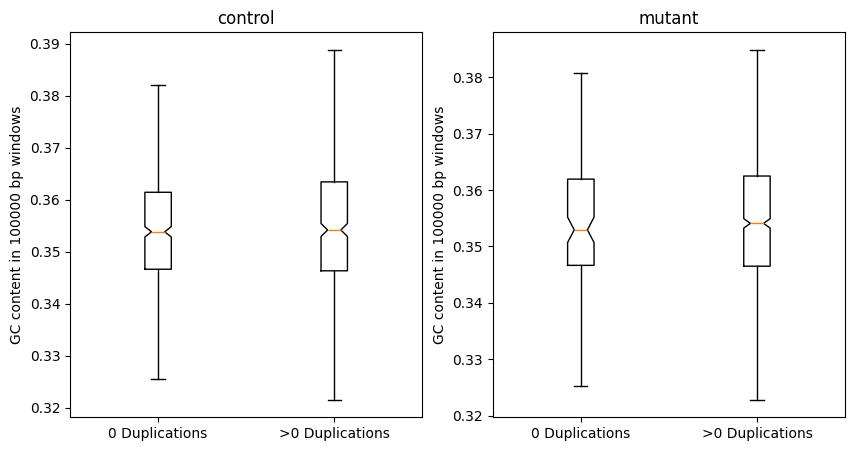

In [69]:
fig = plt.figure(figsize=(10, 5)) # Set the figure size
plt.subplot(1,2,1)
plt.boxplot([DUPs_control_in_chromosomal_bins_counts_and_GC[DUPs_control_in_chromosomal_bins_counts_and_GC['count']==0][3],DUPs_control_in_chromosomal_bins_counts_and_GC[DUPs_control_in_chromosomal_bins_counts_and_GC['count']>0][3]],showfliers=False,notch=True)
plt.xticks([1,2],["0 Duplications",">0 Duplications"])
plt.ylabel("GC content in 100000 bp windows")
plt.title("control")
plt.subplot(1,2,2)
plt.boxplot([DUPs_mutants_in_chromosomal_bins_counts_and_GC[DUPs_mutants_in_chromosomal_bins_counts_and_GC['count']==0][3],DUPs_mutants_in_chromosomal_bins_counts_and_GC[DUPs_mutants_in_chromosomal_bins_counts_and_GC['count']>0][3]],showfliers=False,notch=True)
plt.xticks([1,2],["0 Duplications",">0 Duplications"])
plt.ylabel("GC content in 100000 bp windows")
plt.title("mutant")

In [79]:
from scipy.stats import ranksums
ranksums(DUPs_control_in_chromosomal_bins_counts_and_GC[DUPs_control_in_chromosomal_bins_counts_and_GC['count']==0][3], DUPs_control_in_chromosomal_bins_counts_and_GC[DUPs_control_in_chromosomal_bins_counts_and_GC['count']>0][3], alternative='two-sided')

RanksumsResult(statistic=-0.6920112733471726, pvalue=0.48893024941436103)

In [80]:
from scipy.stats import ranksums
ranksums(DUPs_mutants_in_chromosomal_bins_counts_and_GC[DUPs_mutants_in_chromosomal_bins_counts_and_GC['count']==0][3], DUPs_mutants_in_chromosomal_bins_counts_and_GC[DUPs_mutants_in_chromosomal_bins_counts_and_GC['count']>0][3], alternative='two-sided')

RanksumsResult(statistic=-0.760992712038437, pvalue=0.446661420290255)